# Resale Flats Trend

### I am interested to find out the trend of HDB resale flats and to observe for any relationship or factors affecting the price and sales of resale flats.
Housing had always been an essential item to all consumers, by observing the trend we can observe what factors are affecting the price of the flats in Singapore which will aid in buyer decision making. For buyers, value of the flat is the major concern as most buyers will be staying for years before making another move hence buyers would one flats that are low risk in depreciation and worthy. For this observation i will be viewing via buyer perspective to find out the trend.
### Below are the few main questions:
1) What floor range should buyer purchase? \
2) What town should buyer Purchase a flat from? \
3) Which size should buyers look at? \
4) What duration left of flat lease is better to purchase? \
5) When should buyer purchase?

### Sub-Questions:
1) What is the relationship between floor range and resale price? \
2) What is the highest and lowest resale flat price? \
3) Which Town have the highest resale flat sales volume? \
4) Which is the most expensive town in Singapore? \
5) Is it that some regions have bigger flat sizes even though they are also classified as "4-room"/"5-room"?  \
6) Does flat size affect price? \
7) Does remaining lease duration affect resale price? \
8) When is the best time to sell flat? \
9) Does higher marriage rate means higher purchase volume for resale flat? 

### For this observation i will break into three part
A) Read the data from 2017 till date to find the latest trend. \
B) Observing data \
C) Combining other datasets to find out if i am able to observe changes when other elements are introduced.

### Part A Ref: 
df_2017 - https://data.gov.sg/dataset/resale-flat-prices?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee

### Part B Ref: 
df_2000 : https://data.gov.sg/dataset/resale-flat-prices?resource_id=8c00bf08-9124-479e-aeca-7cc411d884c4 \
df_2012 : https://data.gov.sg/dataset/resale-flat-prices?resource_id=83b2fc37-ce8c-4df4-968b-370fd818138b       
df_2015 : https://data.gov.sg/dataset/resale-flat-prices?resource_id=1b702208-44bf-4829-b620-4615ee19b57c


### Part C Ref: 
df_marriage : https://data.gov.sg/dataset/number-of-civil-marriages?view_id=b4f8dfa0-d4de-417f-8525-1f7ad9b1afa3&resource_id=f7ed4933-0447-4a33-a663-29b3ee78a08a \

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
import numpy as np

# Part A:
Reading Data and understanding the data, clean data if needed.

In [2]:
# reading the data
df_2017 = pd.read_csv('resale flat jan-2017(Ang Wee Hwa).csv')

In [3]:
# check for null value in data and details of 
df_2017.isnull().sum()
# convert month to datetime format
df_2017.month = pd.to_datetime(df_2017['month'])
# check type of data and quantity
df_2017.info()
# overview of the basic stats for the dataframe
display(df_2017.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90123 entries, 0 to 90122
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                90123 non-null  datetime64[ns]
 1   town                 90123 non-null  object        
 2   flat_type            90123 non-null  object        
 3   block                90123 non-null  object        
 4   street_name          90123 non-null  object        
 5   storey_range         90123 non-null  object        
 6   floor_area_sqm       90123 non-null  float64       
 7   flat_model           90123 non-null  object        
 8   lease_commence_date  90123 non-null  int64         
 9   remaining_lease      90123 non-null  object        
 10  resale_price         90123 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 7.6+ MB


,floor_area_sqm,lease_commence_date,resale_price
count,90123.000000,90123.000000,9.012300e+04
mean,97.757126,1994.384441,4.437462e+05
std,24.278614,13.023446,1.543814e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.320000e+05
50%,95.000000,1995.000000,4.138000e+05
75%,113.000000,2003.000000,5.200000e+05
max,249.000000,2019.000000,1.258000e+06


For this observation we will drop block, street name as they are not needed as we have town, we are interested in flat type than the model and since we have lease remaining years having the commence date will be redundant.

In [4]:
# dropping data not needed
df_2017 = df_2017.drop(['block','street_name','flat_model','lease_commence_date'],axis = 'columns')

# Part B:
## Which Floor Range should buyer purchase?
### 1) What is the relationship between floor range and resale price?

1) Will take the average transaction amount for each floor range in Singapore \
2) Will plot the graph based on the outcome

In [5]:
# this graph only needs storey range and resale price hence we drop the rest 
df_storey = df_2017.loc[:,['storey_range','resale_price']]

In [6]:
# group storey range by average transaction price and reset the index
df_storey = df_storey.groupby(['storey_range']).mean()
df_storey = df_storey.reset_index()

In [7]:
# this graph only needs storey range and floor size hence we drop the rest 
df_storey_size = df_2017.loc[:,['storey_range','floor_area_sqm']]
# group storey range by average data floor size and reset the index
df_storey_size = df_storey_size.groupby(['storey_range']).mean()
df_storey_size = df_storey_size.reset_index()

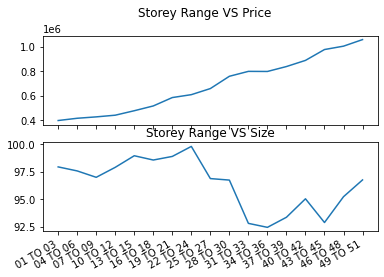

In [8]:
# plot the graph with storey range against price and floor area
fig, (ax1 , ax2) = plt.subplots(2) 
ax1.plot('storey_range', 'resale_price', data = df_storey)
fig.suptitle('Storey Range VS Price')
ax2.plot('storey_range', 'floor_area_sqm', data = df_storey_size)
plt.title('Storey Range VS Size')
fig.autofmt_xdate() 
plt.show()

### Observations:
This graph shows that the higher the floor the higher the price of resale flat. For the size drop dramastic from 25 to 30 floor range.
### Reccomendation:
Purchase flat in range of 13 to 24 floor as size is relatively bigger and cost is in lower.  

## What Area Should buyer Purchase a flat from?
### 2) What is the highest and lowest resale flat price?

1) Will filter to the highest transaction amount in Singapore \
2) Will filter to the lowest transaction amount in Singapore

In [9]:
# Find the highest transaction for resale flat 
high_price = df_2017.resale_price.nlargest(5)
high_price = df_2017.loc[high_price.index,:]
# Find the lowest transaction for resale flat 
low_price = df_2017.resale_price.nsmallest(5)
low_price = df_2017.loc[low_price.index,:]
display(high_price,low_price) # display both value row and columns

,month,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price
78466,2020-09-01,CENTRAL AREA,5 ROOM,43 TO 45,107.0,89 years 04 months,1258000.0
83340,2020-11-01,CENTRAL AREA,5 ROOM,49 TO 51,105.0,89 years 03 months,1248000.0
68305,2020-03-01,CENTRAL AREA,5 ROOM,40 TO 42,107.0,89 years 11 months,1232000.0
85402,2020-12-01,BISHAN,5 ROOM,25 TO 27,120.0,89 years 09 months,1218888.0
87908,2021-01-01,BISHAN,5 ROOM,25 TO 27,120.0,89 years 08 months,1210000.0


,month,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price
67560,2020-02-01,TOA PAYOH,3 ROOM,10 TO 12,67.0,49 years 11 months,140000.0
58957,2019-10-01,GEYLANG,2 ROOM,04 TO 06,45.0,48 years 03 months,150000.0
65804,2020-01-01,TOA PAYOH,2 ROOM,01 TO 03,43.0,62 years 05 months,150000.0
66417,2020-02-01,BUKIT MERAH,1 ROOM,10 TO 12,31.0,54 years 01 month,157000.0
35413,2018-09-01,GEYLANG,2 ROOM,04 TO 06,47.0,51 years 04 months,160000.0


### Observation:
From the top and bottom prices we can observe that size is not the only factor that is affecting the resale price however we can see that sales price is not dependant on size

### 3) Which Town have the highest resale flat sales volume?

1) Will take the month and town and drop the rest \
2) Will count the number of transaction done for the year using the month column \
3) Will plot the graph based on the outcome

In [10]:
# locate the column needed and drop the rest
sale_count = df_2017.loc[:,['month','town']]

In [11]:
# groupby town and count the number of element in month 
sale_count = sale_count.groupby('town').count()

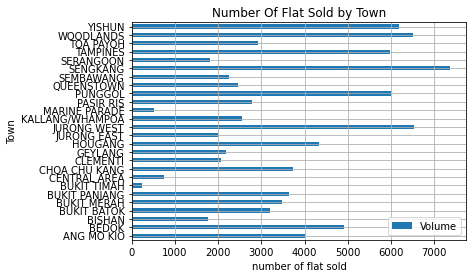

In [12]:
# plot graph town against volume
sale_count.plot(kind = 'barh')
plt.ylabel('Town')
plt.xlabel('number of flat sold')
plt.title('Number Of Flat Sold by Town')
plt.legend(['Volume'])
plt.grid(True) 
plt.show()

### Observations:
From the graph we can see that Sengkang have the highest volume for resale flat in the covered period of over 7000 transaction and bukit Timah being the lowest from 2017 till feb 2021. Next we would like to see if higher sales volume transacts to lower pricing.

### 4) Which is the most expensive town in Singapore?

1) Will take the average transaction amount for each town in Singapore \
2) Will plot the graph based on the outcome

[Text(0, 0, 'ANG MO KIO'),
 Text(1, 0, 'BEDOK'),
 Text(2, 0, 'BISHAN'),
 Text(3, 0, 'BUKIT BATOK'),
 Text(4, 0, 'BUKIT MERAH'),
 Text(5, 0, 'BUKIT PANJANG'),
 Text(6, 0, 'BUKIT TIMAH'),
 Text(7, 0, 'CENTRAL AREA'),
 Text(8, 0, 'CHOA CHU KANG'),
 Text(9, 0, 'CLEMENTI'),
 Text(10, 0, 'GEYLANG'),
 Text(11, 0, 'HOUGANG'),
 Text(12, 0, 'JURONG EAST'),
 Text(13, 0, 'JURONG WEST'),
 Text(14, 0, 'KALLANG/WHAMPOA'),
 Text(15, 0, 'MARINE PARADE'),
 Text(16, 0, 'PASIR RIS'),
 Text(17, 0, 'PUNGGOL'),
 Text(18, 0, 'QUEENSTOWN'),
 Text(19, 0, 'SEMBAWANG'),
 Text(20, 0, 'SENGKANG'),
 Text(21, 0, 'SERANGOON'),
 Text(22, 0, 'TAMPINES'),
 Text(23, 0, 'TOA PAYOH'),
 Text(24, 0, 'WOODLANDS'),
 Text(25, 0, 'YISHUN')]

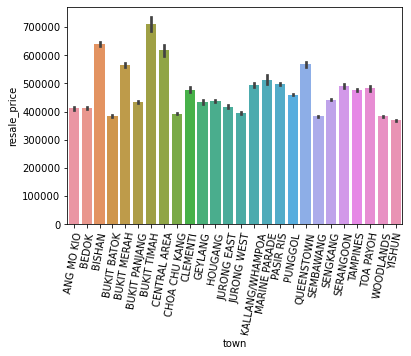

In [13]:
# plot price and town
g = sns.barplot(x = 'town', y = 'resale_price', data = df_2017 , estimator = np.mean)
g.set_xticklabels(g.get_xticklabels(), rotation=80)

In [14]:
# store df_2017 in var growth_df so as not to touch original data
growth_df = df_2017
# use the year only for the month column
growth_df['month'] = growth_df.month.dt.year
growth_df = growth_df.groupby(['month','town']).mean()
growth_df = growth_df.reset_index()

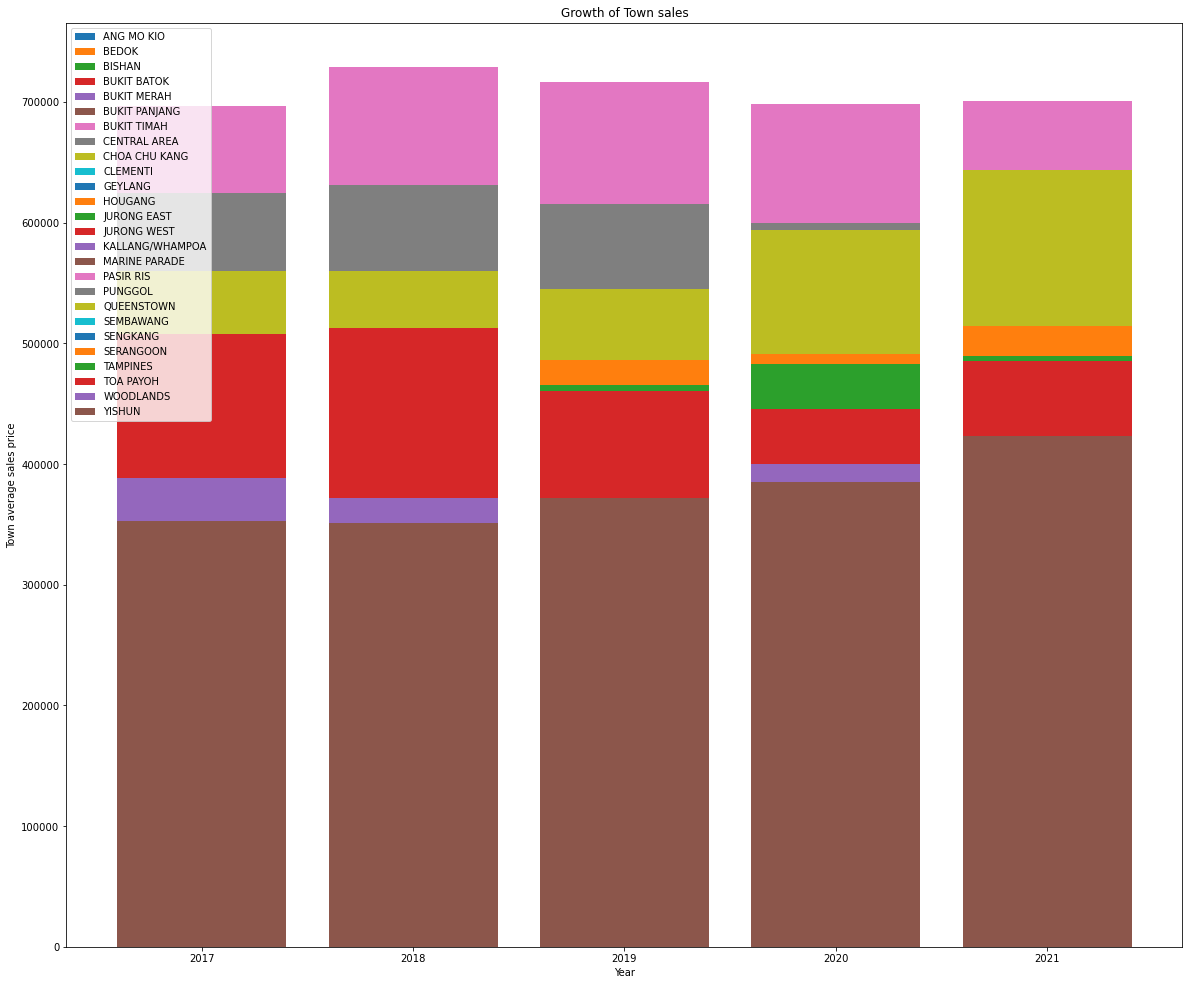

In [15]:
# plot year and price against town
plt.figure(figsize=(20, 17))
# loop and plot graph one by one for each town average sales for the year
for col_val in growth_df['town'].unique(): 
    filter_df = growth_df[growth_df['town'] == col_val]
    plt.bar(filter_df['month'], filter_df['resale_price'], label = col_val) 
plt.xlabel('Year')
plt.ylabel('Town average sales price')
plt.title('Growth of Town sales')
plt.legend()
plt.show()

### Observations:
From the graph we can see that Bukit Timah have the highest average transaction amount of more than 700k making it the most expensive town in Singapore and Sengkang doesnt seems to have the lowest average price. However Yishun have a steady year on year growth.

### Reccomendation:
With the steady growth, i would reccomend to purchase flats in Yishun as it is having a steady growth and prices is at the lowest average amount compared to the other towns and the fourth in terms of sales volume over the past few years shows more buyers interested in Yishun.

## What size of flat should buyers look at?
### 5) Is it that some regions have bigger flat sizes even though they are also classified as "4-room"/"5-room"? 
1) For this obsevation we will use flat type, town and floor area to plot the graph and observe the difference if any for the same flat type and size difference.

In [16]:
# filter only flat, town and area column in var type_df
type_df = df_2017.loc[:,['flat_type','town' , 'floor_area_sqm']]

In [17]:
# use the max price of each town flat type
type_df = type_df.groupby(['flat_type','town']).max()
type_df = type_df.reset_index()

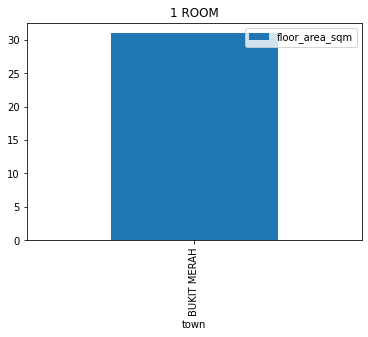

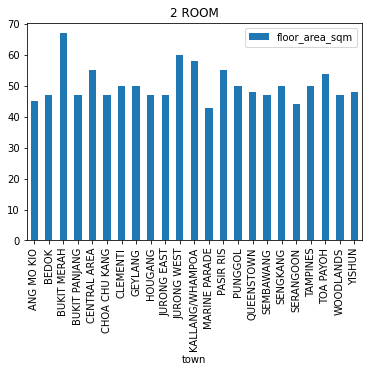

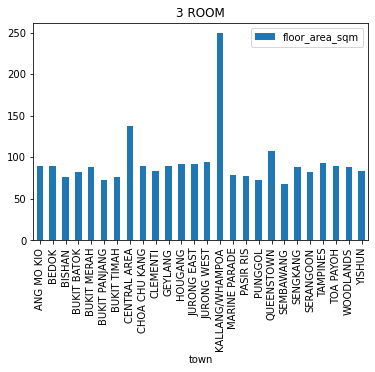

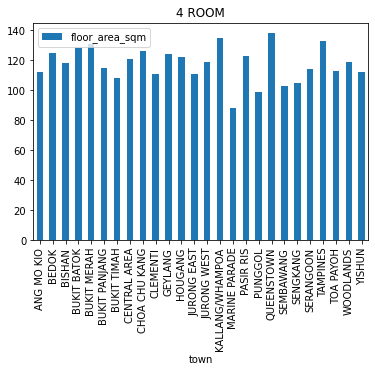

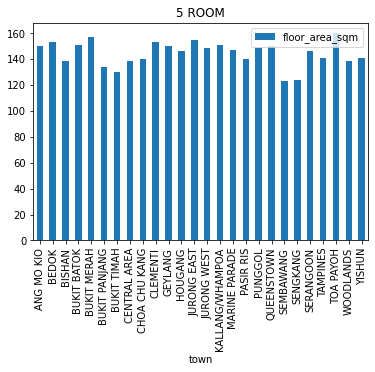

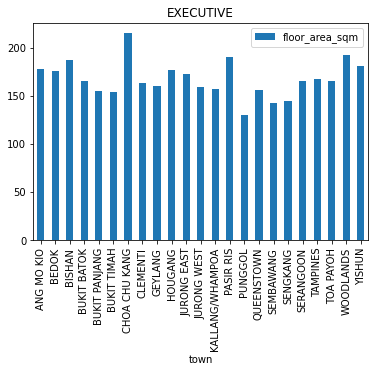

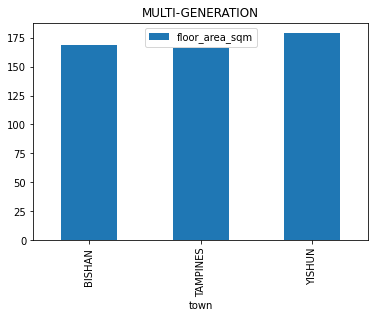

In [18]:
# plot each type of flat individually and compare town and max size
for flat_type in type_df.flat_type.unique():
    g = type_df[type_df.flat_type == flat_type]
    g.plot(kind = 'bar', x = 'town', legend = True)
    plt.title(flat_type)

### Observations:
Some areas have larger floor area althought its flat size is the same type of flats and it differs from towns. It town have its unique floor size. However for Yishun flat size is pretty much average as compared to other towns hence flat type is not affecting the price woiuld advise to look for size instead of flat type.


### 6) Does flat size affect price? 
1) For this observation will plot graph to compare floor area against resale price at different towns

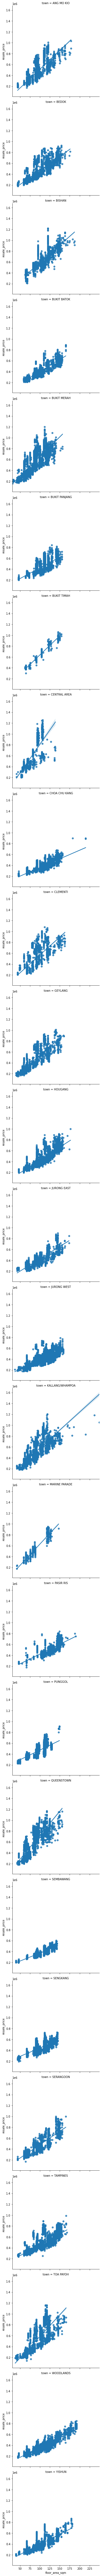

In [38]:
# plot individual town scatter plot to see the trend for price and size
sns.lmplot( x='floor_area_sqm' , y='resale_price' , data = df_2017 ,row = 'town') 

### Observations:
From observation, smaller flat have the higher correlationship and it varies from town to town.
### Reccomendation:
For Yishun size after 125sqm prices are correlated with size hence it is advisable to purchase flats that is above 125sqm.

## What duration left of flat lease is better to purchase?
### 7) Does remaining lease duration affect resale price?
1) Will use remaining lease and resale price for this observation \
2) Will plot graph base on the two element mentioned and observe if there is any relationship

In [20]:
lease_df = df_2017.groupby(['remaining_lease']).mean()
lease_df.drop(['floor_area_sqm','month'],axis='columns', inplace=True)

In [21]:
lease_df = lease_df.reset_index()
new_num = []
for num in lease_df['remaining_lease']:
    num = re.findall(r'[0-9]+',num) # find the numbers only and omit the years 
    new_num.append(num[0]) # append the found number and assign them to the empty list
lease_df['remaining_lease'] = new_num # replace the remaning lease with new list 
lease_df['remaining_lease'] = lease_df['remaining_lease'].astype(int) #set it as integer

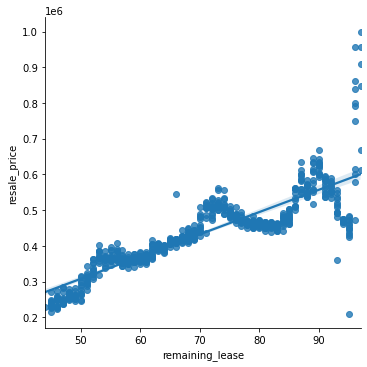

In [22]:
# plot price against remaining lease against price 
sns.lmplot(x='remaining_lease',y='resale_price',data = lease_df)

### Observations:
from the graph we can see a sharp deep in price after 5 years mainly due to HDB regulation that new house owner can only sell their houses after 5 years of ownership hence market will be overflow with owners selling their house to own another house or investors selling their properties increasing supply hence the sharp price deep. After which market correction with new flats having more facilities around it completed (i.e: shopping malls) hence price increase. However as years goes by flat price depreciates with reducing ramining lease. 

However for the second graph we can see that the lease remaining less than 90 years is correlated to resale price.

ref: https://www.hdb.gov.sg/residential/buying-a-flat/resale/procedures/conditions-after-buying
### Reccomendation:
To purchase flat with lease remaining less than 95 year or 75 years mark as during this remaining lease the price is the lowest.

## When should buyer purchase?
### 8) When is the best time to buy flat?
1) Will use the larger dataset for this to have broader range. \
2) Will check for empty or null value in cell \
3) Will plot the heatmap base on year and month to find out the best time to sell flat

## Combining Data:
1) Will import resale flat data from 2000 to 2021 and import civil marriage data to have a broader dataset \
2) Will merge them vertically for the resale flat datasets 

Ref: \
df_2000 : https://data.gov.sg/dataset/resale-flat-prices?resource_id=8c00bf08-9124-479e-aeca-7cc411d884c4 \
df_2012 : https://data.gov.sg/dataset/resale-flat-prices?resource_id=83b2fc37-ce8c-4df4-968b-370fd818138b       
df_2015 : https://data.gov.sg/dataset/resale-flat-prices?resource_id=1b702208-44bf-4829-b620-4615ee19b57c 

In [23]:
df_2000 = pd.read_csv('resale flat 2000-feb-2012(Ang Wee Hwa).csv')
df_2012 = pd.read_csv('resale flat mar-2012-to-dec-2014(Ang Wee Hwa).csv')
df_2015 = pd.read_csv('resale flat jan-2015-to-dec-2016(Ang Wee Hwa).csv')
df_2017 = pd.read_csv('resale flat jan-2017(Ang Wee Hwa).csv')

In [24]:
# concat the files 
df_combine_total = pd.concat([df_2000,df_2012,df_2015,df_2017],axis = 0)

In [25]:
# use var best_df as not to touch original data
best_df = df_combine_total
best_df['month'] = pd.to_datetime(best_df.month) 
best_df.isnull().sum() 
# there are many null value in remaining_lease column however for this observation we \
# do not need this column and will drop it later hence did not clean it.
best_df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
90118,2021-01-01,YISHUN,EXECUTIVE,643,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,590000.0,65 years 08 months
90119,2021-01-01,YISHUN,EXECUTIVE,724,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,588000.0,64 years 07 months
90120,2021-01-01,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,670000.0,66 years
90121,2021-01-01,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,690000.0,65 years 11 months
90122,2021-01-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,179.0,Multi Generation,1987,860000.0,66 years


In [26]:
# convert datetime format
best_df = best_df[(best_df['month'].dt.year < 2021)]

In [27]:
# split the month and year
best_df['year'] = best_df.month.dt.year
best_df['month'] = best_df.month.dt.month_name()

<ipython-input-27-d138b760ac35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_df['year'] = best_df.month.dt.year
<ipython-input-27-d138b760ac35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_df['month'] = best_df.month.dt.month_name()


In [28]:
# use pivot table and move year to column 
best_df = best_df.pivot_table(values='resale_price',index='month',columns='year')

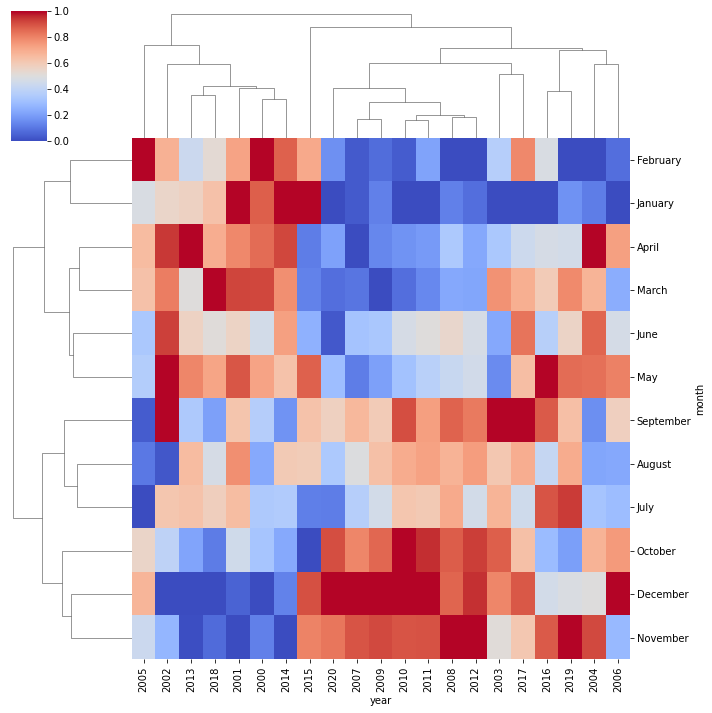

In [29]:
# plot heatmap
sns.clustermap(best_df, cmap='coolwarm', standard_scale=1) 

### Observations:
From the heat map we can see that in recent years higher resale price is spotted in last quarter while lower price is obeserve in the starting quarter of the year. 
### Reccomendaton:
Hence the best time to start buying is during the first quarter of the year.

# Part C:
### 9) Does higher marriage rate means higher purchase volume for resale flat?
1) Use the above combine data and filter and keep records for the years between 2009 to 2018 \
2) Will group by by year and count the flat type \
3) After filtering the data we will merge inner for marriage data \
4) Will than plot the correlationship between marrriage volume and resale flat count

Ref: \
df_marriage : https://data.gov.sg/dataset/number-of-civil-marriages?view_id=b4f8dfa0-d4de-417f-8525-1f7ad9b1afa3&resource_id=f7ed4933-0447-4a33-a663-29b3ee78a08a \

In [30]:
df_marriage = pd.read_csv('marriages(Ang Wee Hwa).csv')

In [31]:
# convert to datetime format and use only range from 2008 to 2020
df_combine = df_combine_total 
df_combine['month'] = pd.to_datetime(df_combine_total['month'])
df_combine = df_combine[(df_combine['month'].dt.year > 2008) & (df_combine['month'].dt.year < 2019)]
df_combine['year'] = df_combine.month.dt.year
df_combine.drop('month',axis='columns', inplace=True)

<ipython-input-31-ff4aaf76937e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combine['year'] = df_combine.month.dt.year
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
# use only price and year and count num of element in price with groupby 
df_combine = df_combine.loc[:,['year','resale_price']]
df_combine = df_combine.groupby('year').count()
df_combine = df_combine.reset_index()

In [33]:
# merge marriage and resale flat csv with the key as year
df_combine = pd.merge(df_combine, df_marriage, 'inner', 'year') 

In [36]:
df_combine = df_combine.rename(columns = {'resale_price':'Number of resale flat sold'})

In [37]:
# plot correlationship heatmap
corr2 = df_combine.corr()
corr2.style.background_gradient(cmap='coolwarm')

,year,Number of resale flat sold,no_of_marriages
year,1.000000,-0.636092,0.050971
Number of resale flat sold,-0.636092,1.000000,-0.468843
no_of_marriages,0.050971,-0.468843,1.000000


### Observations:
from the heatmap we can see that they are negatively correlated and have a weak correlationship hence higher marriage rate doesn't mean higher purchasing volume of resale flat. However interestingly we can see that year have a negative correlationship with number of resale flats sold, hence we can see that resale flat sold had been reducing as years goes by.